In this document we do some EDA on the data

# import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
from multiprocessing import Pool
pd.set_option('display.max_rows', 500)

# Read in data

Check data size and basic statistics for each feature

In [2]:
training = pd.read_csv('first_round_training_data.csv')
testing = pd.read_csv('first_round_testing_data.csv')
training.shape + testing.shape

(6000, 21, 6000, 11)

In [3]:
training.describe()

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10
count,6000.000000,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03
mean,485.198954,1.952379e+03,406.348529,189.205842,5.868163e+00,5.598597e+00,272.300821,22.133231,5.823664e+04,35.902066,5.351032e+04,8.842895e+04,202.732522,6.271156e+03,1.285985e+06,3.400877e+03,3.166863e+04,4.545394e+05,7.860735e+05,1.989520e+07
std,11401.971393,5.419588e+04,12018.898941,2621.779049,8.631865e+00,7.686898e+00,2027.460514,302.172768,3.173068e+06,101.629348,1.894866e+06,2.854543e+06,2754.503943,2.585508e+05,9.850723e+07,1.999508e+05,1.116889e+06,2.847995e+07,5.885757e+07,1.529785e+09
min,0.000003,1.683797e-07,0.000005,0.000002,9.985942e-07,9.810610e-07,0.000624,0.023699,3.962831e-04,0.001024,6.457597e-10,5.493777e-09,0.000001,4.344229e-06,1.635864e-06,5.456653e-05,4.411611e-03,3.011145e-03,2.366726e-03,1.974795e-03
25%,0.088221,4.765771e-02,0.102304,0.118314,7.416296e-01,3.818154e-01,0.152059,0.035407,5.930812e-01,0.101478,3.100601e-02,3.173294e-02,0.098178,1.319373e-01,1.150362e-01,1.443224e-01,1.135895e-01,1.115708e-01,1.267717e-01,1.253268e-01
50%,1.050304,9.405962e-01,1.044908,1.068467,2.225808e+00,2.684398e+00,0.600827,2.931083,5.930812e-01,0.727611,9.449563e-01,1.030499e+00,0.945947,8.297855e-01,7.539155e-01,9.864325e-01,5.891701e-01,5.922906e-01,6.644951e-01,6.705953e-01
75%,10.938565,1.569199e+01,10.665397,9.902064,6.680183e+00,7.117767e+00,2.374035,17.850021,6.783967e+00,13.969790,2.784766e+01,3.001000e+01,9.803828,6.052952e+00,5.736029e+00,7.422284e+00,4.637157e+00,4.773050e+00,5.571728e+00,4.905501e+00
max,713682.207601,3.034568e+06,864530.632179,139767.494732,8.367195e+01,4.117541e+01,35698.591553,20086.397753,1.738083e+08,517.197610,1.197060e+08,1.615907e+08,128491.084741,1.572225e+07,7.630284e+09,1.488592e+07,7.789923e+07,2.187522e+09,4.558485e+09,1.184961e+11


In [4]:
testing.describe()

,Group,Parameter1,Parameter10,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9
count,6000.0000,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03
mean,59.5000,1.072897e+05,26.514627,369.101132,1.132272e+03,2.196607e+07,5.019799,5.404172,210.884571,59.810770,8.764239e+04
std,34.6427,2.980241e+06,84.807106,6352.033456,3.220140e+04,1.429351e+09,6.782677,6.788654,1616.938611,1545.270888,3.885921e+06
min,0.0000,1.331475e-09,0.001024,0.000001,5.436324e-08,4.859234e-10,0.000003,0.000005,0.000624,0.023699,3.962831e-04
25%,29.7500,2.233015e-02,0.101478,0.090422,6.985572e-02,1.867368e-02,0.827784,0.563965,0.152059,0.035407,5.930812e-01
50%,59.5000,8.489791e-01,0.727611,1.000019,8.985648e-01,1.002728e+00,2.772987,2.684398,0.600827,2.931083,5.930812e-01
75%,89.2500,3.103161e+01,10.060093,12.159195,1.300345e+01,5.193707e+01,6.680183,7.117767,2.374035,17.850021,6.783967e+00
max,119.0000,1.758842e+08,517.197610,317368.685606,2.183219e+06,1.101618e+11,83.671947,41.175410,35698.591553,66984.723637,1.738083e+08


#  Labels

Check distribution and transform into numerical values

In [5]:
training.Quality_label.value_counts()

Pass         2417
Good         1584
Excellent    1107
Fail          892
Name: Quality_label, dtype: int64

In [6]:
code = {'Pass':1, 'Good':2, 'Excellent':3, 'Fail':0}
training['new_Quality'] = training['Quality_label'].apply(lambda x : code[x])

# Feature type

Clear we can see which features are likely to be categorical (ordinal more likely)

In [7]:
training.apply(lambda x : len(x.value_counts()),  axis=0)

Parameter1       6000
Parameter2       6000
Parameter3       6000
Parameter4       6000
Parameter5        132
Parameter6         80
Parameter7         14
Parameter8         23
Parameter9         16
Parameter10        41
Attribute1       6000
Attribute2       6000
Attribute3       6000
Attribute4        600
Attribute5        553
Attribute6        394
Attribute7        702
Attribute8        565
Attribute9        626
Attribute10       565
Quality_label       4
new_Quality         4
dtype: int64

In [8]:
testing.apply(lambda x : len(x.value_counts()),  axis=0)

Group           120
Parameter1     5675
Parameter10      41
Parameter2     5675
Parameter3     5675
Parameter4     5675
Parameter5      130
Parameter6       76
Parameter7       15
Parameter8       23
Parameter9       16
dtype: int64

Since the number of values differs in training and validation set, we should check the intersection/union, as well as their counts in both sets

In [222]:
def check_values(i):
    colname = 'Parameter' + str(i)
    values1 = training[colname].values
    values2 = testing[colname].values
    source = ['training']*training.shape[0] + ['validation']*testing.shape[0]
    return pd.crosstab(np.concatenate((values1, values2), axis=-1), np.array(source), rownames=['values'], colnames=['dataset'])

In [224]:
check_values(5)

dataset,training,validation
values,,
9.985942e-07,1,0
2.155259e-06,1,0
3.345182e-06,1,1
2.166860e-05,3,2
2.418583e-05,7,4
2.699548e-05,4,3
3.363188e-05,4,2
3.753887e-05,1,0
4.676719e-05,3,2


In [225]:
check_values(6)

dataset,training,validation
values,,
9.810610e-07,1,0
1.192327e-06,1,0
2.601314e-06,1,0
4.669720e-06,0,1
5.675318e-06,1,0
6.897466e-06,1,1
1.018798e-05,5,3
1.238191e-05,6,5
2.701376e-05,6,0


In [226]:
check_values(7)

dataset,training,validation
values,,
0.000624,2,8
0.002465,41,59
0.009739,0,3
0.038483,495,510
0.152059,2004,2044
0.600827,1533,1619
2.374035,887,874
9.380474,29,41
37.064872,103,83


In [227]:
check_values(8)

dataset,training,validation
values,,
0.023699,8,7
0.035407,2504,2509
0.052899,38,48
0.079033,29,15
0.118077,163,154
0.176410,6,4
0.263561,1,2
0.393766,19,20
1.313144,1,0


In [228]:
check_values(9)

dataset,training,validation
values,,
3.962831e-04,131,148
4.532889e-03,0,258
4.532889e-03,191,0
5.184951e-02,0,897
5.184951e-02,856,0
5.930812e-01,2833,2733
2.005852e+00,153,71
6.783967e+00,1180,1158
2.294397e+01,49,0


In [229]:
check_values(10)

dataset,training,validation
values,,
0.001024,8,3
0.001421,1,21
0.001974,8,18
0.002741,54,27
0.003806,56,35
0.005285,0,67
0.005285,17,0
0.007340,39,35
0.010192,63,111


# Quantiles

Check quantiles to see the shift of data. Clearly the data changes in magnitudes so perhaps some log transforms are needed.

In [19]:
quantiles = training.iloc[:, :10].apply(lambda x : np.quantile(x.values, np.linspace(0, 1, 21)))
quantiles['quantiles'] = np.linspace(0, 1, 21)
quantiles = quantiles.set_index('quantiles')
quantiles[['Parameter' + str(i) for i in range(1, 11)]]

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10
quantiles,,,,,,,,,,
0.00,0.000003,1.683797e-07,0.000005,0.000002,9.985942e-07,9.810610e-07,0.000624,0.023699,3.962831e-04,0.001024
0.05,0.003079,7.775900e-04,0.003325,0.003804,7.297817e-04,1.335279e-03,0.038483,0.035407,4.532889e-03,0.014153
0.10,0.010337,3.791882e-03,0.011919,0.015526,3.794407e-03,4.302969e-03,0.152059,0.035407,5.184951e-02,0.037897
0.15,0.026706,1.025207e-02,0.028532,0.034713,3.062070e-02,2.048156e-02,0.152059,0.035407,5.184951e-02,0.052625
0.20,0.049228,2.418129e-02,0.056416,0.069442,2.213892e-01,9.748952e-02,0.152059,0.035407,5.930812e-01,0.073078
0.25,0.088221,4.765771e-02,0.102304,0.118314,7.416296e-01,3.818154e-01,0.152059,0.035407,5.930812e-01,0.101478
0.30,0.149628,9.106257e-02,0.166406,0.190981,1.031282e+00,8.330112e-01,0.152059,0.035407,5.930812e-01,0.140916
0.35,0.255731,1.657108e-01,0.267028,0.309179,1.151085e+00,1.230409e+00,0.152059,0.035407,5.930812e-01,0.195680
0.40,0.426827,3.008061e-01,0.433148,0.469483,1.434060e+00,1.817391e+00,0.152059,0.035407,5.930812e-01,0.271729


In [20]:
quantiles = testing.iloc[:, 1:].apply(lambda x : np.quantile(x.values, np.linspace(0, 1, 21)))
quantiles['quantiles'] = np.linspace(0, 1, 21)
quantiles = quantiles.set_index('quantiles')
quantiles[['Parameter' + str(i) for i in range(1, 11)]]

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10
quantiles,,,,,,,,,,
0.00,1.331475e-09,0.000001,5.436324e-08,4.859234e-10,0.000003,0.000005,0.000624,0.023699,3.962831e-04,0.001024
0.05,1.506822e-04,0.003282,1.733705e-03,6.046119e-05,0.000730,0.001335,0.038483,0.035407,4.532889e-03,0.010192
0.10,9.103810e-04,0.011754,6.401754e-03,4.914355e-04,0.005276,0.007724,0.152059,0.035407,5.184951e-02,0.027291
0.15,3.517127e-03,0.026707,1.736168e-02,2.146308e-03,0.091900,0.044685,0.152059,0.035407,5.184951e-02,0.037897
0.20,9.491910e-03,0.050978,3.760906e-02,6.617692e-03,0.428092,0.212694,0.152059,0.035407,5.184951e-02,0.073078
0.25,2.233015e-02,0.090422,6.985572e-02,1.867368e-02,0.827784,0.563965,0.152059,0.035407,5.930812e-01,0.101478
0.30,5.151822e-02,0.157769,1.189556e-01,4.423834e-02,1.151085,1.012395,0.152059,0.035407,5.930812e-01,0.140916
0.35,1.103055e-01,0.245870,2.062726e-01,9.516222e-02,1.434060,1.495371,0.152059,0.035407,5.930812e-01,0.195680
0.40,2.157063e-01,0.415431,3.445508e-01,2.005018e-01,1.786601,1.817391,0.152059,0.035407,5.930812e-01,0.271729


In [21]:
def check_cross_tab(i, normalize):
    values = training['Parameter'+str(i)].values
    values = np.log(values)/np.log(10)
    #values = (values - np.mean(values))/np.std(values)
    values = np.round(values, 0)
    return pd.crosstab(training['Quality_label'], values, normalize=normalize, rownames=['Quality'], colnames=['values'])
    

# Check marginal relationship

Now we look at the marginal relationships between each feature and the label. 

To make it easier to read, we make log transforms to the features and round them as integers and make contingency tables (normalized by rows) to see the distribution of labels over different ranges. 

In [22]:
check_cross_tab(1, 'index')

values,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Quality,,,,,,,,,,,,,
Excellent,0.000000,0.003613,0.009033,0.039747,0.110208,0.205059,0.252936,0.211382,0.118338,0.036134,0.011743,0.000903,0.000903
Fail,0.000000,0.002242,0.013453,0.028027,0.117713,0.207399,0.251121,0.205157,0.115471,0.050448,0.006726,0.002242,0.000000
Good,0.000000,0.002525,0.007576,0.046086,0.108586,0.207702,0.250631,0.210859,0.110480,0.042929,0.010732,0.001263,0.000631
Pass,0.000414,0.000414,0.005792,0.041787,0.119983,0.205627,0.253620,0.208109,0.113364,0.037650,0.010757,0.002482,0.000000


In [23]:
check_cross_tab(2, 'index')

values,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,-0.0,1.0,2.0,3.0,4.0,5.0,6.0
Quality,,,,,,,,,,,,,,
Excellent,0.000000,0.000903,0.004517,0.029810,0.055104,0.138211,0.182475,0.208672,0.174345,0.126468,0.050587,0.021680,0.007227,0.000000
Fail,0.000000,0.001121,0.007848,0.022422,0.050448,0.115471,0.198430,0.209641,0.170404,0.144619,0.058296,0.016816,0.004484,0.000000
Good,0.000631,0.000000,0.006944,0.026515,0.068813,0.129419,0.179924,0.200758,0.176768,0.123737,0.051136,0.025253,0.008207,0.001894
Pass,0.000414,0.002069,0.005379,0.017377,0.063302,0.126189,0.184526,0.210592,0.193628,0.116260,0.059992,0.016136,0.003310,0.000827


In [24]:
check_cross_tab(3, 'index')

values,-5.0,-4.0,-3.0,-2.0,-1.0,-0.0,1.0,2.0,3.0,4.0,5.0,6.0
Quality,,,,,,,,,,,,
Excellent,0.000000,0.010840,0.033424,0.108401,0.224932,0.272809,0.205059,0.093948,0.037940,0.012647,0.000000,0.000000
Fail,0.000000,0.012332,0.041480,0.113229,0.200673,0.251121,0.223094,0.109865,0.039238,0.008969,0.000000,0.000000
Good,0.000631,0.006313,0.036616,0.102273,0.227273,0.255682,0.200758,0.113005,0.044823,0.010732,0.001894,0.000000
Pass,0.001655,0.009102,0.042201,0.110468,0.203972,0.249483,0.216384,0.110054,0.045097,0.010343,0.000827,0.000414


In [25]:
check_cross_tab(4, 'index')

values,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0
Quality,,,,,,,,,,,,
Excellent,0.000000,0.000903,0.004517,0.045167,0.107498,0.205962,0.280036,0.204155,0.104788,0.035230,0.009937,0.001807
Fail,0.001121,0.001121,0.008969,0.038117,0.091928,0.192825,0.288117,0.223094,0.115471,0.030269,0.006726,0.002242
Good,0.000000,0.001894,0.008838,0.032197,0.094697,0.213384,0.279040,0.219697,0.108586,0.035354,0.005682,0.000631
Pass,0.000000,0.000827,0.010757,0.031858,0.100952,0.210178,0.276789,0.213074,0.104675,0.041787,0.008275,0.000827


In [26]:
check_cross_tab(5, 'index')

values,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0
Quality,,,,,,,,,
Excellent,0.000000,0.000000,0.012647,0.062331,0.037037,0.026197,0.464318,0.383921,0.013550
Fail,0.002242,0.011211,0.024664,0.107623,0.144619,0.132287,0.292601,0.274664,0.010090
Good,0.000000,0.002525,0.022727,0.092172,0.065657,0.068182,0.384470,0.348485,0.015783
Pass,0.000000,0.000414,0.009516,0.060819,0.038891,0.034340,0.285064,0.531237,0.039719


In [27]:
check_cross_tab(6, 'index')

values,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,-0.0,1.0,2.0
Quality,,,,,,,,,
Excellent,0.000000,0.001807,0.010840,0.063234,0.039747,0.053297,0.420054,0.397471,0.013550
Fail,0.002242,0.006726,0.030269,0.109865,0.172646,0.142377,0.232063,0.298206,0.005605
Good,0.000631,0.005051,0.016414,0.098485,0.077652,0.083965,0.340278,0.362374,0.015152
Pass,0.000000,0.001241,0.007447,0.061647,0.045097,0.055027,0.203558,0.594539,0.031444


In [28]:
check_cross_tab(7, 'index')

values,-3.0,-1.0,-0.0,1.0,2.0,3.0,4.0,5.0
Quality,,,,,,,,
Excellent,0.003613,0.331527,0.551942,0.000000,0.062331,0.050587,0.000000,0.000000
Fail,0.017937,0.362108,0.282511,0.013453,0.169283,0.140135,0.001121,0.013453
Good,0.003788,0.401515,0.403409,0.005682,0.096591,0.085859,0.000000,0.003157
Pass,0.007034,0.485312,0.379810,0.003310,0.056268,0.067025,0.000827,0.000414


In [29]:
check_cross_tab(8, 'index')

values,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0
Quality,,,,,,,
Excellent,0.000903,0.271906,0.105691,0.616983,0.003613,0.000903,0.000000
Fail,0.001121,0.535874,0.108744,0.330717,0.015695,0.006726,0.001121
Good,0.000000,0.386364,0.105429,0.502525,0.003157,0.002525,0.000000
Pass,0.002482,0.558544,0.031858,0.385602,0.006206,0.014894,0.000414


In [30]:
check_cross_tab(9, 'index')

values,-3.0,-2.0,-1.0,-0.0,1.0,2.0,3.0,4.0,5.0,6.0,8.0
Quality,,,,,,,,,,,
Excellent,0.031617,0.019874,0.121951,0.395664,0.351400,0.058717,0.020777,0.000000,0.000000,0.000000,0.000000
Fail,0.007848,0.054933,0.084081,0.445067,0.187220,0.076233,0.141256,0.001121,0.001121,0.000000,0.001121
Good,0.020833,0.054924,0.109848,0.437500,0.263258,0.069444,0.043561,0.000000,0.000000,0.000631,0.000000
Pass,0.023169,0.013653,0.195283,0.603227,0.105916,0.022755,0.034754,0.000827,0.000000,0.000000,0.000414


In [31]:
check_cross_tab(10, 'index')

values,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
Quality,,,,,,,
Excellent,0.002710,0.047877,0.462511,0.220416,0.119241,0.121048,0.026197
Fail,0.040359,0.217489,0.171525,0.153587,0.209641,0.143498,0.063901
Good,0.017045,0.116793,0.357955,0.164773,0.138889,0.147096,0.057449
Pass,0.002069,0.026065,0.249897,0.290029,0.280099,0.123293,0.028548


It seems that the distributions of labels on Parameter 1~4 are similiar. To check this we compare the distribution of two labels over different feature ranges. The output below will be 4 by 4 matrices. The relationship between index and labels are:
    * 0 : Excellent
    * 1 : Fail
    * 2 : Good
    * 3 : Pass

We should also mention that $KL(P||Q)\ne KL(Q||P)$ so the values are $\frac{KL(P||Q)+KL(Q||P}{2}$

In [40]:
def check_KL(i, prior_weight):
    values = training['Parameter'+str(i)].values
    values = np.log(values)/np.log(10)
    values = np.round(values, 0)
    values = pd.crosstab(training['Quality_label'], values, normalize='index').values
    values = values*(1-prior_weight) + prior_weight*(1/values.shape[1])
    results = np.zeros((4, 4))
    for i in range(4):
        for j in range(4):
            results[i, j] = np.sum(-values[i, :]*np.log(values[j, :]/values[i, :]))
    results = (results + results.T)/2
    return results

In [41]:
check_KL(1, 0.1)

array([[0.        , 0.00487208, 0.00118076, 0.00144023],
       [0.00487208, 0.        , 0.00549846, 0.00552025],
       [0.00118076, 0.00549846, 0.        , 0.00135146],
       [0.00144023, 0.00552025, 0.00135146, 0.        ]])

In [42]:
check_KL(2, 0.1)

array([[0.        , 0.00569468, 0.00243806, 0.00621574],
       [0.00569468, 0.        , 0.00781391, 0.00666555],
       [0.00243806, 0.00781391, 0.        , 0.00562269],
       [0.00621574, 0.00666555, 0.00562269, 0.        ]])

In [43]:
check_KL(3, 0.1)

array([[0.        , 0.00474015, 0.00343445, 0.00466183],
       [0.00474015, 0.        , 0.00460856, 0.00089304],
       [0.00343445, 0.00460856, 0.        , 0.00255332],
       [0.00466183, 0.00089304, 0.00255332, 0.        ]])

In [44]:
check_KL(4, 0.1)

array([[0.        , 0.00422712, 0.00403153, 0.00363087],
       [0.00422712, 0.        , 0.0021116 , 0.00383593],
       [0.00403153, 0.0021116 , 0.        , 0.00105517],
       [0.00363087, 0.00383593, 0.00105517, 0.        ]])

In [45]:
check_KL(5, 0.1)

array([[0.        , 0.1849297 , 0.03423627, 0.06817007],
       [0.1849297 , 0.        , 0.06378194, 0.20530495],
       [0.03423627, 0.06378194, 0.        , 0.07458152],
       [0.06817007, 0.20530495, 0.07458152, 0.        ]])

In [46]:
check_KL(6, 0.1)

array([[0.        , 0.18835574, 0.03032359, 0.10723344],
       [0.18835574, 0.        , 0.07147369, 0.22087755],
       [0.03032359, 0.07147369, 0.        , 0.10384053],
       [0.10723344, 0.22087755, 0.10384053, 0.        ]])

In [47]:
check_KL(7, 0.1)

array([[0.        , 0.16894585, 0.03998069, 0.05610642],
       [0.16894585, 0.        , 0.05467052, 0.10610606],
       [0.03998069, 0.05467052, 0.        , 0.01818283],
       [0.05610642, 0.10610606, 0.01818283, 0.        ]])

In [48]:
check_KL(8, 0.1)

array([[0.        , 0.15835275, 0.02761699, 0.17163011],
       [0.15835275, 0.        , 0.05574397, 0.03996657],
       [0.02761699, 0.05574397, 0.        , 0.07516873],
       [0.17163011, 0.03996657, 0.07516873, 0.        ]])

In [49]:
check_KL(9, 0.1)

array([[0.        , 0.16241289, 0.03350516, 0.19457281],
       [0.16241289, 0.        , 0.06320906, 0.18424872],
       [0.03350516, 0.06320906, 0.        , 0.14296975],
       [0.19457281, 0.18424872, 0.14296975, 0.        ]])

In [50]:
check_KL(10, 0.1)

array([[0.        , 0.28374449, 0.05579781, 0.12528171],
       [0.28374449, 0.        , 0.10173163, 0.2352887 ],
       [0.05579781, 0.10173163, 0.        , 0.14679722],
       [0.12528171, 0.2352887 , 0.14679722, 0.        ]])

We can see Parameters 1~4 are kind of useless to predict labels (at least marginally)

Next let's look at the distributions of Parameters 1~4 after log transformation. You can see the distributions are different between training and validation sets. So perhaps we should remove these 4 features

In [53]:
def check_marginal(num, func):
    col_name = 'Parameter' + str(num)
    parameter_train = func(training[col_name])
    parameter_test = func(testing[col_name])
    
    fig = plt.figure(figsize=(12, 6))
    
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax1.hist(parameter_train, bins=30, alpha=0.5, fill='green', label='training', density=True)
    ax1.hist(parameter_test, bins=30, alpha=0.5, fill='red', label='testing', density='True')
    ax1.legend(loc=1)
    
    parameter = np.concatenate([parameter_train, parameter_test])
    ax2.hist(parameter, bins=30, density='True')
    plt.show()

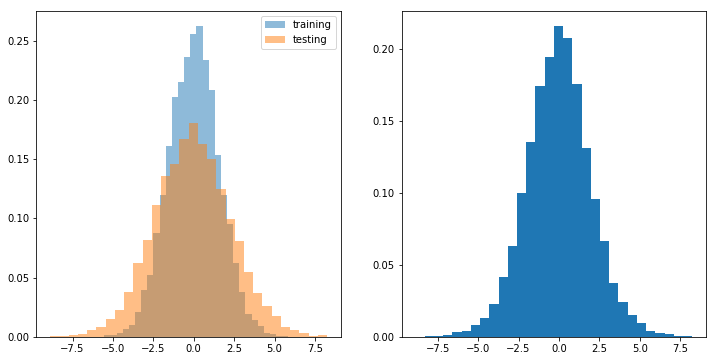

In [54]:
check_marginal(1, lambda x : np.log(x)/np.log(10))

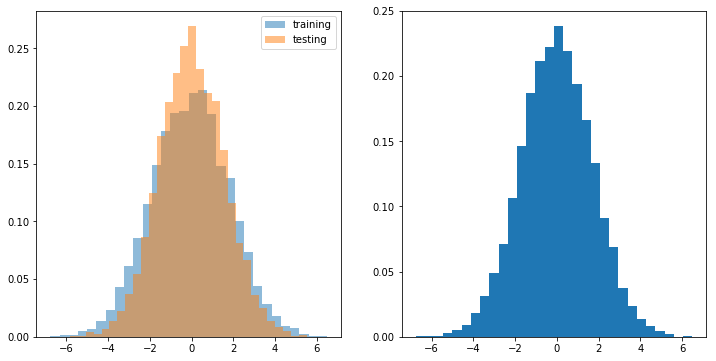

In [55]:
check_marginal(2, lambda x : np.log(x)/np.log(10))

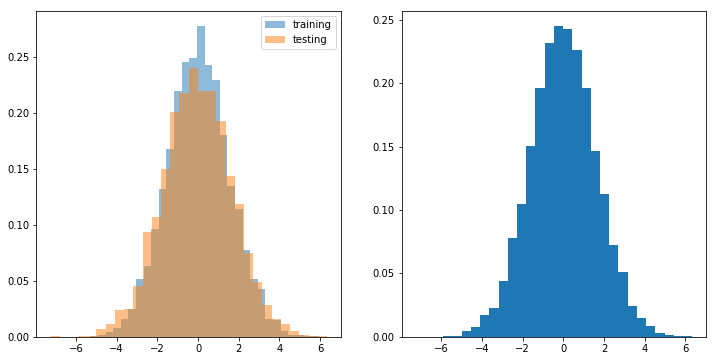

In [56]:
check_marginal(3, lambda x : np.log(x)/np.log(10))

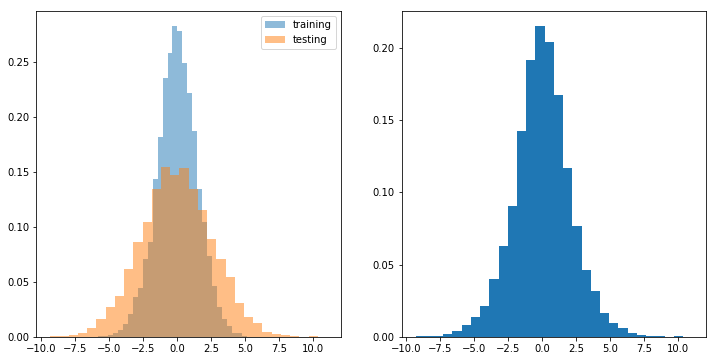

In [57]:
check_marginal(4, lambda x : np.log(x)/np.log(10))

# Check first order interaction

After checking marginal attributes, we should look at the first order interactions.

Similarly we create small squares in the 2-d space of 

In [61]:
features = ['Parameter' + str(i) for i in range(1, 11)]

In [65]:
temp_training = training.copy()
temp_training = temp_training[features + ['Quality_label']]
temp_training[features] = np.log(temp_training[features])

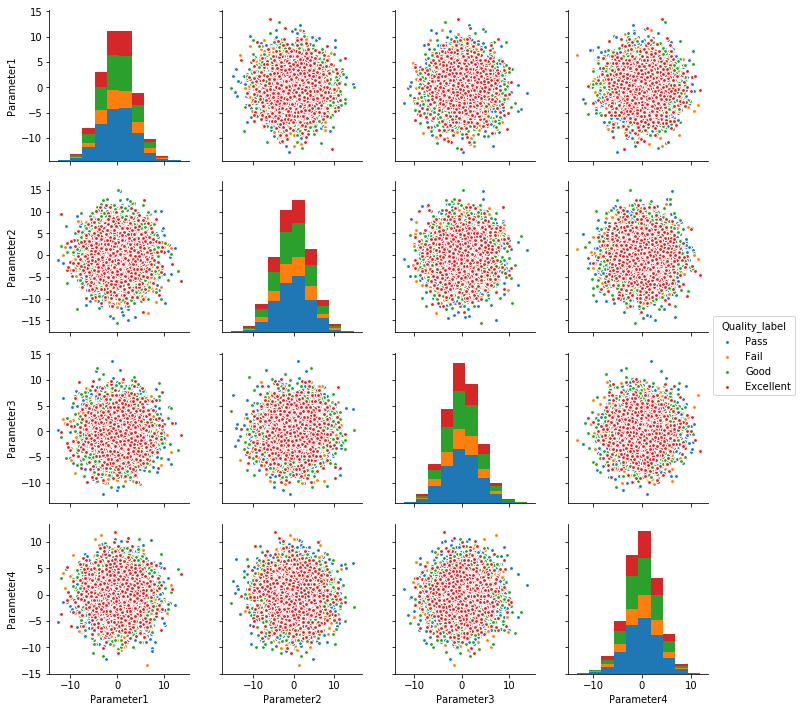

In [77]:
sns.pairplot(temp_training[['Parameter' + str(i) for i in range(1, 5)] + ['Quality_label']], hue='Quality_label', plot_kws={"s": 15})
plt.show()

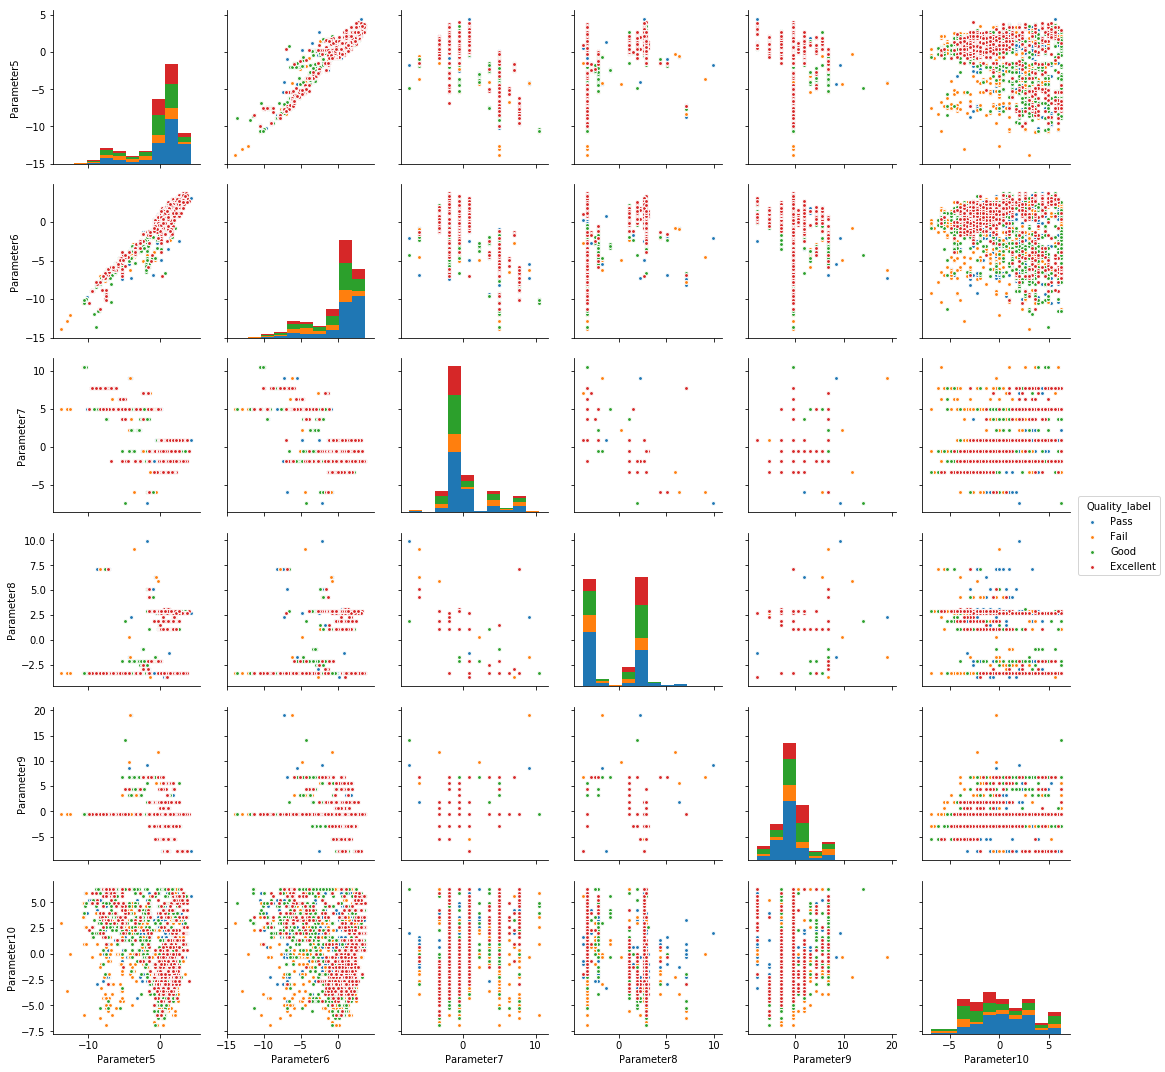

In [76]:
sns.pairplot(temp_training[['Parameter' + str(i) for i in range(5, 11)] + ['Quality_label']], hue='Quality_label', plot_kws={"s": 15})
plt.show()

In [264]:
def check_pair_KL(inputs):
    
    i, j, margin, n_bins, prior = inputs
    temp_training = training[['Parameter' + str(i), 'Parameter' + str(j), 'Quality_label']]
    temp_training.columns = ['x', 'y', 'Quality_label']
    temp_training[['x','y']] = np.log(temp_training[['x','y']])
    
    xmin = np.min(temp_training['x'])-margin
    xmax = np.max(temp_training['x'])+margin
    ymin = np.min(temp_training['y'])-margin
    ymax = np.max(temp_training['y'])+margin

    xbins = np.linspace(xmin, xmax, n_bins)
    ybins = np.linspace(ymin, ymax, n_bins)
    
    counts = np.zeros((n_bins-1, n_bins-1, 4))
    labels = ['Fail', 'Pass', 'Good', 'Excellent']
    
    for i1 in range(n_bins-1):
        for j1 in range(n_bins-1):
            for k1 in range(4):
                counts[i1, j1, k1] = np.sum((temp_training['x'].apply(lambda x: (x>=xbins[i1])&(x<xbins[i1+1])).values)
                                          &(temp_training['y'].apply(lambda x: (x>=ybins[j1])&(x<ybins[j1+1])).values)
                                          &(temp_training['Quality_label']==labels[k1]).values)
    
    margins = np.sum(counts, axis=(0, 1), keepdims=True)
    counts = counts/margins
    counts = (1-prior)*counts + prior/((n_bins-1)**2)
    
    results = np.zeros((4, 4))
    for i1 in range(4):
        for j1 in range(4):
            results[i1, j1] = np.sum(-counts[:, :, i1]*np.log(counts[:, :, j1]/counts[:, :, i1]))
    results = (results + results.T)/2
    return i, j, results

In [265]:
pool = Pool(processes = 8)
results = pool.map(check_pair_KL, [(i, j, 0.1, 15, 0.5) for j in range(1, 11) for i in range(1, j)])


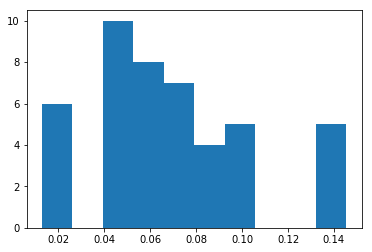

In [273]:
plt.hist([np.mean(results[i][2]) for i in range(45)])
plt.show()

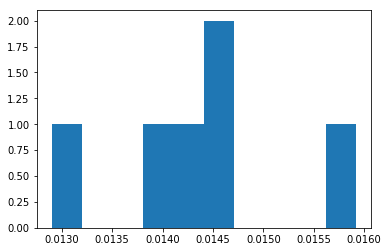

In [274]:
plt.hist([np.mean(results[i][2]) for i in range(45) if((results[i][0]<=4)&(results[i][1]<=4))])
plt.show()

In [267]:
[(np.mean(results[i][2]), results[i][0], results[i][1]) for i in range(45) if np.mean(results[i][2])>0.1]

[(0.10486274959087608, 7, 8),
 (0.1029513469255079, 5, 9),
 (0.10325849221061872, 6, 9),
 (0.10547353359607553, 7, 9),
 (0.13400099003513927, 5, 10),
 (0.13790833157102786, 6, 10),
 (0.1454319911941325, 7, 10),
 (0.13471797617040832, 8, 10),
 (0.13817050364704941, 9, 10)]

In [271]:
[(np.mean(results[i][2]), results[i][0], results[i][1]) for i in range(45) if np.mean(results[i][2])>0.05]

[(0.052664155050968345, 1, 6),
 (0.05337883744120293, 2, 6),
 (0.05219169820989911, 3, 6),
 (0.051979074356333005, 4, 6),
 (0.060891128110428835, 5, 6),
 (0.06802426044961826, 1, 7),
 (0.06496631379661415, 2, 7),
 (0.06751622133862945, 3, 7),
 (0.06689749088563067, 4, 7),
 (0.09403527666661715, 5, 7),
 (0.09038109403327763, 6, 7),
 (0.08947288165810835, 5, 8),
 (0.09127579781682138, 6, 8),
 (0.10486274959087608, 7, 8),
 (0.053230016489473495, 1, 9),
 (0.053775621845807156, 2, 9),
 (0.054652967430992204, 3, 9),
 (0.05522190457775433, 4, 9),
 (0.1029513469255079, 5, 9),
 (0.10325849221061872, 6, 9),
 (0.10547353359607553, 7, 9),
 (0.08276413509119557, 8, 9),
 (0.07211004636473324, 1, 10),
 (0.0719904308442523, 2, 10),
 (0.07262656412176072, 3, 10),
 (0.07180929123906757, 4, 10),
 (0.13400099003513927, 5, 10),
 (0.13790833157102786, 6, 10),
 (0.1454319911941325, 7, 10),
 (0.13471797617040832, 8, 10),
 (0.13817050364704941, 9, 10)]

In [246]:
[(np.mean(results[i][2]), results[i][0], results[i][1]) for i in range(45) if np.mean(results[i][2])>0.08]

[(0.08243589897995429, 3, 7),
 (0.08503739103824301, 3, 8),
 (0.28597418706724764, 7, 8),
 (0.082712148512054, 3, 9),
 (0.2482310923756974, 7, 9),
 (1.6944977835388284, 8, 9),
 (0.22035245886906252, 7, 10),
 (1.0177600831921894, 8, 10),
 (1.0810142357284709, 9, 10)]

In [256]:
def get_heatmap(inputs):
    
    i, j, margin, n_bins, prior = inputs
    temp_training = training[['Parameter' + str(i), 'Parameter' + str(j), 'Quality_label']]
    temp_training.columns = ['x', 'y', 'Quality_label']
    temp_training[['x','y']] = np.log(temp_training[['x','y']])
    
    xmin = np.min(temp_training['x'])-margin
    xmax = np.max(temp_training['x'])+margin
    ymin = np.min(temp_training['y'])-margin
    ymax = np.max(temp_training['y'])+margin

    xbins = np.linspace(xmin, xmax, n_bins)
    ybins = np.linspace(ymin, ymax, n_bins)
    
    counts = np.zeros((n_bins-1, n_bins-1, 4))
    labels = ['Fail', 'Pass', 'Good', 'Excellent']
    
    for i1 in range(n_bins-1):
        for j1 in range(n_bins-1):
            for k1 in range(4):
                counts[i1, j1, k1] = np.sum((temp_training['x'].apply(lambda x: (x>=xbins[i1])&(x<xbins[i1+1])).values)
                                          &(temp_training['y'].apply(lambda x: (x>=ybins[j1])&(x<ybins[j1+1])).values)
                                          &(temp_training['Quality_label']==labels[k1]).values)
                
    margins = np.sum(counts, axis=(0, 1), keepdims=True)
    counts = counts/margins
    counts = (1-prior)*counts + prior/((n_bins-1)**2)
    
    fig = plt.figure(figsize=(12, 12))
    
    ax1 = fig.add_subplot(221)
    ax1.set_title('Fail')
    ax2 = fig.add_subplot(222)
    ax2.set_title('Pass')
    ax3 = fig.add_subplot(223)
    ax3.set_title('Good')
    ax4 = fig.add_subplot(224)
    ax4.set_title('Excellent')

    ax1.imshow(counts[:, :, 0], cmap='hot')
    ax2.imshow(counts[:, :, 1], cmap='hot')
    ax3.imshow(counts[:, :, 2], cmap='hot')
    ax4.imshow(counts[:, :, 3], cmap='hot')
    
    plt.show()

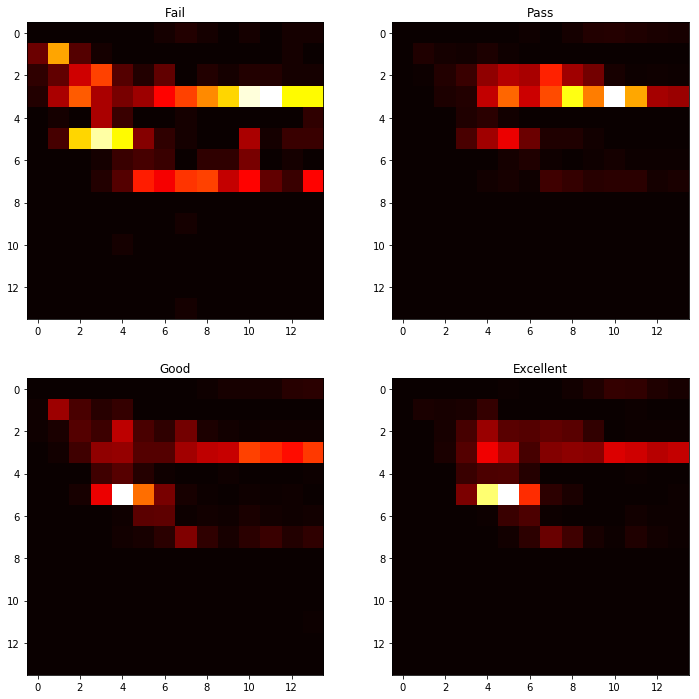

In [257]:
get_heatmap((9, 10, 0.1, 15, 0.1))

In [163]:
def ten_to_two(x):
    result = []
    while x>0:
        result = [x % 2 != 0] + result
        x = x//2
    result = [False]*(10-len(result)) + result
    return np.array(result)

In [164]:
N_SPLIT=10
skf = StratifiedKFold(n_splits=N_SPLIT)
indices = []
for train_index, test_index in skf.split(X=training[features], y=training['new_Quality']):
    indices.append((train_index, test_index))

In [165]:
def my_CV(X, y, clf):
    temp_results = np.zeros((N_SPLIT, 4))#train_acc, test_acc, train_log_loss, test_log_loss
    for i in range(N_SPLIT):
        clf.fit(X.iloc[indices[i][0], :], y.iloc[indices[i][0], :])
        train_prediction = clf.predict(X.iloc[indices[0][0], :])
        train_prob = clf.predict_proba(X.iloc[indices[0][0], :])
        test_prediction = clf.predict(X.iloc[indices[0][1], :])
        test_prob = clf.predict_proba(X.iloc[indices[0][1], :])
        temp_results[i, 0] = accuracy_score(train_prediction, y.iloc[indices[0][0], :])
        temp_results[i, 1] = accuracy_score(test_prediction, y.iloc[indices[0][1], :])
        temp_results[i, 2] = -log_loss(y.iloc[indices[0][0], :], train_prob)
        temp_results[i, 3] = -log_loss(y.iloc[indices[0][1], :], test_prob)
    return np.mean(temp_results, axis=0, keepdims=True)

In [166]:
def check_overfitting(results):
    fig = plt.figure(figsize=(12, 14))
    
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    acc_diff = results[:,0] - results[:,1]
    acc_order = np.argsort(results[:, 0])
    logloss_diff = results[:,2] - results[:,3]
    logloss_order = np.argsort(results[:, 2])
    
    ax1.hist(acc_diff)
    ax1.set_title('Histogram : Different of accuracy between training and validation')
    ax2.hist(logloss_diff)
    ax2.set_title('Histogram : Different of Log Loss between training and validation')
    ax3.plot(results[:, 0][acc_order], acc_diff[acc_order])
    ax3.set_title('Difference vs training accuracy')
    ax4.plot(results[:, 2][logloss_order], logloss_diff[logloss_order])
    ax4.set_title('Difference vs training log loss')
        
    plt.plot()

In [167]:
def get_result(i):
    y = training[['new_Quality']]
    if i>0:
        X = training[features].iloc[:,ten_to_two(i)]
    else:
        X = training[features]
    clf = RandomForestClassifier(max_depth=4, n_estimators=100, criterion='gini')
    return my_CV(X, y, clf)
pool = Pool(processes = 8)
results = pool.map(get_result, range(1024))
results = np.concatenate(results)

Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Process ForkPoolWorker-7:
Process ForkPoolWorker-3:
Process ForkPoolWorker-5:
Process ForkPoolWorker-8:
Process ForkPoolWorker-6:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/lifengwei/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/lifengwei/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/lifengwei/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/lifengwei/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/lifengwei/anaconda3/lib/pytho

In [ ]:
check_overfitting(results)

In [ ]:
np.max(results[:, 0]), np.argmax(results[:, 0]), results[np.argmax(results[:, 0]), 1]

In [ ]:
np.max(results[:, 1]), np.argmax(results[:, 1]), results[np.argmax(results[:, 1]), 0]

In [ ]:
np.max(results[:, 2]), np.argmax(results[:, 2]), results[np.argmax(results[:, 3]), 2]

In [ ]:
np.max(results[:, 3]), np.argmax(results[:, 3]), results[np.argmax(results[:, 2]), 3]